In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
for i in reversed(range(0, len([2,2,1])-1)):
    print(i)

1
0


In [5]:
len(([2,2,1]))

3

In [108]:
class NN():
    def __init__(self, layers, alpha):
        self.layers = layers
        self.L = len(layers)
        self.alpha = alpha
        #self.w = [np.random.randn(l2, l1 + 1) for l2, l1 in zip(layers[1:], layers[:-1])]
        self.w = [np.array([( 0.15, 0.2),
                          (0.25, 0.3)]),
                  np.array([(0.4, 0.5),
                          (0.45, 0.55)])]
        
        self.b = [np.array([(0.35),
                          (0.35)]),
                 np.array([(0.6),
                          (0.6)])]
        
    def sigmoid(self, x):
        
        return 1/(1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        # derivative of activation function
        return x * (1-x)
    
    def feedforward(self, x):
        
        z = []
        a = [x]
        
        for l in range(0,self.L -1 ):
            z_l = (np.dot(self.w[l],a[l]) + (self.b[l].T))
            a_l = self.sigmoid(z_l)
            z.append(z_l)
            a.append(a_l)
        return z, a
    
    def loss(self, x, y):
        
        m = len(y)
        j = 0
        z, a = self.feedforward(x)
        a_L = a[-1]
        
        j += np.sum(y*np.log(a_L) + (1-y)*np.log(1-a_L))
        
        return (-j)/m
        
        
    
    
    def predict(self, x):
        _, a = self.feedforward(x)
        return a[-1]
    
    def backward (self, x, y):
        z, a = self.feedforward(x)
        dz =  [-(y/a[-1] - (1-y)/(1-a[-1]))]
        dw = []
        db = []
        
        for i in reversed(range(0, len(self.layers)-1)):
            dw_ = (np.dot(dz[-1], a[i-1].T)) * self.sigmoid_derivative(a[i+1])
            db_ = (np.sum(dz[-1] * self.sigmoid_derivative(a[i]), 0)).reshape(-1,1)
            dz_ = np.dot(dz[-1] *self.sigmoid_derivative(a[i+1]), self.w[i].T)
            dw.append(dw_)
            db.append(db_)
            dz.append(dz_)
        
        # Đảo ngược dW, db
        dw = dw[::-1]
        db = db[::-1]
        
        # Gradient descent
        for i in range(0, len(self.layers)-1):
            self.w[i] = self.w[i] - self.alpha * dw[i]
            self.b[i] = self.b[i] - self.alpha * db[i]
            
    def fit(self, x, y, epochs=20000, verbose=10):
        loss_hist = []
        for epoch in range(0, epochs):
            self.backward(x, y)
            if epoch % verbose == 0:
                loss = self.loss(x, y)
                print("Epoch {}, loss {}".format(epoch, loss))
                loss_hist.append(loss)
                
        self.cost = loss_hist
    
    def plot(self):
        plt.figure()
        sns.set_style('white')
        plt.plot(self.cost, 'r')
        plt.title("Convergence Graph of Cost Function")
        plt.xlabel("Number of Iterations")
        plt.ylabel("Cost")
        plt.show()

In [109]:
a = NN([2,2,2],0.5)
x = np.array([0.05, 0.1])
a.feedforward(x)

([array([0.3775, 0.3925]), array([1.13575019, 1.1952579 ])],
 [array([0.05, 0.1 ]),
  array([0.59326999, 0.59688438]),
  array([0.75689851, 0.76768012])])

In [110]:
y = np.array([0.01,0.99])
a.loss(x,y)

0.8396267540864419

In [111]:
a.fit(x,y)

Epoch 0, loss 1.5455766793701482
Epoch 10, loss 0.1583191869963442
Epoch 20, loss 0.11276146168397026
Epoch 30, loss 0.11201538118300648
Epoch 40, loss 0.1120114368762391
Epoch 50, loss 0.11201140977974702
Epoch 60, loss 0.11201141275745018
Epoch 70, loss 0.11201141677508826
Epoch 80, loss 0.1120114208561644
Epoch 90, loss 0.11201142494388627
Epoch 100, loss 0.11201142903478932
Epoch 110, loss 0.11201143312866417
Epoch 120, loss 0.11201143722550053
Epoch 130, loss 0.11201144132530039
Epoch 140, loss 0.11201144542806664
Epoch 150, loss 0.11201144953380192
Epoch 160, loss 0.11201145364250915
Epoch 170, loss 0.11201145775419118
Epoch 180, loss 0.11201146186885083
Epoch 190, loss 0.11201146598649091
Epoch 200, loss 0.11201147010711415
Epoch 210, loss 0.11201147423072362
Epoch 220, loss 0.11201147835732196
Epoch 230, loss 0.11201148248691216
Epoch 240, loss 0.11201148661949688
Epoch 250, loss 0.11201149075507917
Epoch 260, loss 0.1120114948936618
Epoch 270, loss 0.11201149903524762
Epoch 28

Epoch 3520, loss 0.11201302239361574
Epoch 3530, loss 0.11201302768858937
Epoch 3540, loss 0.11201303298771179
Epoch 3550, loss 0.11201303829098719
Epoch 3560, loss 0.11201304359841985
Epoch 3570, loss 0.11201304891001397
Epoch 3580, loss 0.11201305422577396
Epoch 3590, loss 0.11201305954570406
Epoch 3600, loss 0.1120130648698085
Epoch 3610, loss 0.11201307019809159
Epoch 3620, loss 0.11201307553055762
Epoch 3630, loss 0.11201308086721096
Epoch 3640, loss 0.11201308620805583
Epoch 3650, loss 0.1120130915530965
Epoch 3660, loss 0.1120130969023375
Epoch 3670, loss 0.11201310225578286
Epoch 3680, loss 0.11201310761343716
Epoch 3690, loss 0.11201311297530464
Epoch 3700, loss 0.11201311834138958
Epoch 3710, loss 0.11201312371169642
Epoch 3720, loss 0.11201312908622943
Epoch 3730, loss 0.11201313446499304
Epoch 3740, loss 0.1120131398479916
Epoch 3750, loss 0.11201314523522937
Epoch 3760, loss 0.11201315062671086
Epoch 3770, loss 0.11201315602244037
Epoch 3780, loss 0.11201316142242232
Epoch

Epoch 7210, loss 0.11201529785798468
Epoch 7220, loss 0.11201530502441168
Epoch 7230, loss 0.11201531219700103
Epoch 7240, loss 0.11201531937575968
Epoch 7250, loss 0.11201532656069454
Epoch 7260, loss 0.11201533375181266
Epoch 7270, loss 0.11201534094912072
Epoch 7280, loss 0.11201534815262591
Epoch 7290, loss 0.11201535536233515
Epoch 7300, loss 0.11201536257825537
Epoch 7310, loss 0.11201536980039357
Epoch 7320, loss 0.11201537702875675
Epoch 7330, loss 0.11201538426335184
Epoch 7340, loss 0.11201539150418596
Epoch 7350, loss 0.11201539875126607
Epoch 7360, loss 0.11201540600459917
Epoch 7370, loss 0.11201541326419234
Epoch 7380, loss 0.11201542053005265
Epoch 7390, loss 0.11201542780218712
Epoch 7400, loss 0.11201543508060283
Epoch 7410, loss 0.11201544236530692
Epoch 7420, loss 0.11201544965630633
Epoch 7430, loss 0.11201545695360832
Epoch 7440, loss 0.11201546425721995
Epoch 7450, loss 0.11201547156714822
Epoch 7460, loss 0.11201547888340042
Epoch 7470, loss 0.1120154862059836
Ep

Epoch 10840, loss 0.11201836646211169
Epoch 10850, loss 0.1120183764073912
Epoch 10860, loss 0.11201838636211126
Epoch 10870, loss 0.11201839632628346
Epoch 10880, loss 0.11201840629991948
Epoch 10890, loss 0.11201841628303101
Epoch 10900, loss 0.11201842627562962
Epoch 10910, loss 0.11201843627772713
Epoch 10920, loss 0.11201844628933527
Epoch 10930, loss 0.1120184563104657
Epoch 10940, loss 0.11201846634113025
Epoch 10950, loss 0.1120184763813406
Epoch 10960, loss 0.11201848643110869
Epoch 10970, loss 0.1120184964904462
Epoch 10980, loss 0.1120185065593651
Epoch 10990, loss 0.11201851663787707
Epoch 11000, loss 0.11201852672599408
Epoch 11010, loss 0.11201853682372803
Epoch 11020, loss 0.11201854693109076
Epoch 11030, loss 0.11201855704809421
Epoch 11040, loss 0.11201856717475031
Epoch 11050, loss 0.112018577311071
Epoch 11060, loss 0.11201858745706827
Epoch 11070, loss 0.11201859761275415
Epoch 11080, loss 0.11201860777814067
Epoch 11090, loss 0.1120186179532397
Epoch 11100, loss 0.

Epoch 14440, loss 0.11202266023945337
Epoch 14450, loss 0.11202267449419213
Epoch 14460, loss 0.11202268876397221
Epoch 14470, loss 0.11202270304881422
Epoch 14480, loss 0.11202271734873856
Epoch 14490, loss 0.1120227316637659
Epoch 14500, loss 0.11202274599391664
Epoch 14510, loss 0.11202276033921141
Epoch 14520, loss 0.11202277469967091
Epoch 14530, loss 0.11202278907531575
Epoch 14540, loss 0.11202280346616666
Epoch 14550, loss 0.11202281787224438
Epoch 14560, loss 0.11202283229356971
Epoch 14570, loss 0.1120228467301634
Epoch 14580, loss 0.11202286118204623
Epoch 14590, loss 0.11202287564923913
Epoch 14600, loss 0.11202289013176303
Epoch 14610, loss 0.11202290462963886
Epoch 14620, loss 0.11202291914288758
Epoch 14630, loss 0.1120229336715302
Epoch 14640, loss 0.11202294821558777
Epoch 14650, loss 0.11202296277508131
Epoch 14660, loss 0.11202297735003205
Epoch 14670, loss 0.11202299194046106
Epoch 14680, loss 0.11202300654638953
Epoch 14690, loss 0.11202302116783869
Epoch 14700, lo

Epoch 18150, loss 0.1120291841287509
Epoch 18160, loss 0.11202920571040587
Epoch 18170, loss 0.1120292273176633
Epoch 18180, loss 0.11202924895056207
Epoch 18190, loss 0.11202927060914088
Epoch 18200, loss 0.11202929229343858
Epoch 18210, loss 0.1120293140034942
Epoch 18220, loss 0.11202933573934663
Epoch 18230, loss 0.11202935750103506
Epoch 18240, loss 0.11202937928859863
Epoch 18250, loss 0.11202940110207646
Epoch 18260, loss 0.11202942294150794
Epoch 18270, loss 0.11202944480693239
Epoch 18280, loss 0.11202946669838917
Epoch 18290, loss 0.11202948861591794
Epoch 18300, loss 0.11202951055955812
Epoch 18310, loss 0.11202953252934945
Epoch 18320, loss 0.11202955452533163
Epoch 18330, loss 0.11202957654754447
Epoch 18340, loss 0.11202959859602774
Epoch 18350, loss 0.11202962067082152
Epoch 18360, loss 0.11202964277196571
Epoch 18370, loss 0.11202966489950036
Epoch 18380, loss 0.11202968705346576
Epoch 18390, loss 0.112029709233902
Epoch 18400, loss 0.11202973144084938
Epoch 18410, loss

In [112]:
a.predict(x)

array([[0.00944607, 0.98946366],
       [0.01062235, 0.9904846 ]])

In [113]:
a.w[-1]

array([[ 9.76101433e-01, -9.50125835e-02],
       [ 1.07522767e+00, -1.06703862e-03]])

In [114]:
a.b[-1]

array([[-5.19366905, -5.19366905],
       [ 4.07251789,  4.07251789]])

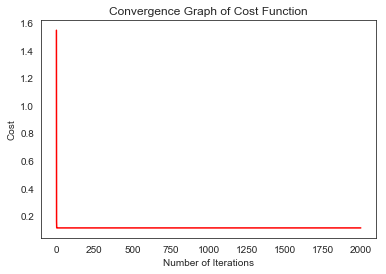

In [115]:
a.plot()